<h2>Data Gathering</h2>
Directly download dataset(Student_Performance.csv)

In [10]:
import pandas as pd

In [5]:
df = pd.read_csv("Student_Performance.csv")

<h2>Data analysis</h2>

In [15]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [20]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [22]:
 import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>],
       [<Axes: title={'center': 'Performance Index'}>, <Axes: >]],
      dtype=object)

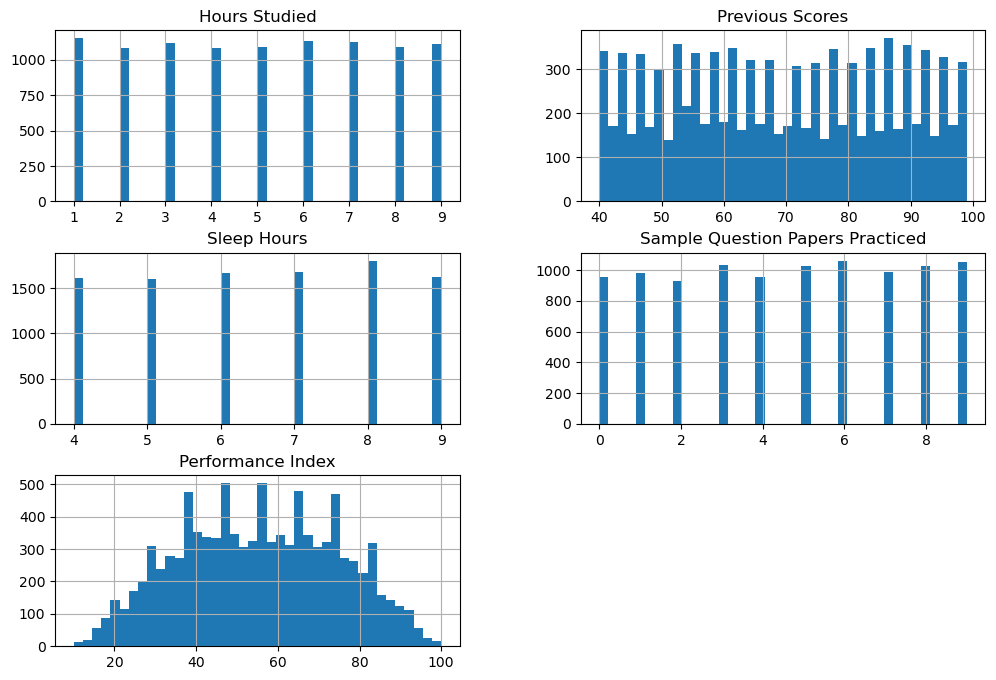

In [32]:
df.hist(bins=40, figsize=(12, 8))

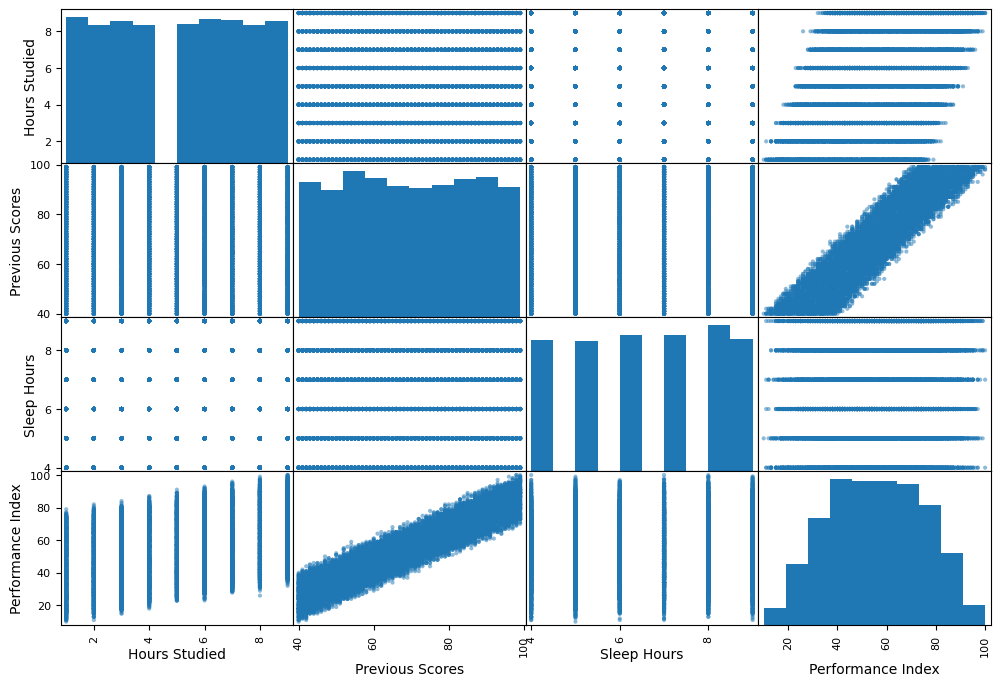

In [30]:
from pandas.plotting import scatter_matrix

attributes = ["Hours Studied", "Previous Scores", "Sleep Hours",
              "Performance Index"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

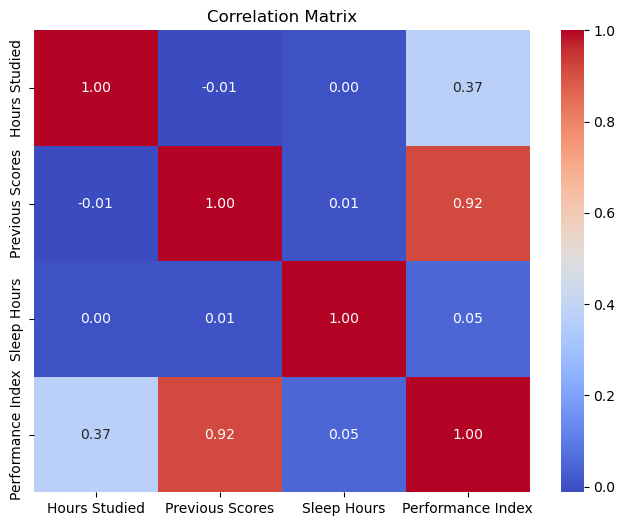

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes = ["Hours Studied", "Previous Scores", "Sleep Hours", "Performance Index"]

# Compute the correlation matrix
correlation_matrix = df[attributes].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Add title
plt.title("Correlation Matrix")
plt.show()

<h2>Data Preparation for ML</h2>

In [36]:
# Handle missing values (if any)
df = df.dropna()  # Drop rows with missing values

In [67]:
from sklearn.model_selection import train_test_split

# Select features (X) and target variable (Y)
x = df.drop('Performance Index', axis=1)  
y = df['Performance Index']  # Target column

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [69]:
df["Extracurricular Activities"].head(10)

0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    1
8    0
9    0
Name: Extracurricular Activities, dtype: int32

In [56]:
# Convert "yes" to 1 and "no" to 0, and change type to int
df["Extracurricular Activities"] = (df["Extracurricular Activities"].replace({"Yes": 1, "No": 0}).astype(int))

df["Extracurricular Activities"].head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_4016\3691983383.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"Yes": 1, "No": 0})


0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    1
8    0
9    0
Name: Extracurricular Activities, dtype: int32

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Extracurricular Activities'}>,
        <Axes: title={'center': 'Sleep Hours'}>],
       [<Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: title={'center': 'Performance Index'}>]], dtype=object)

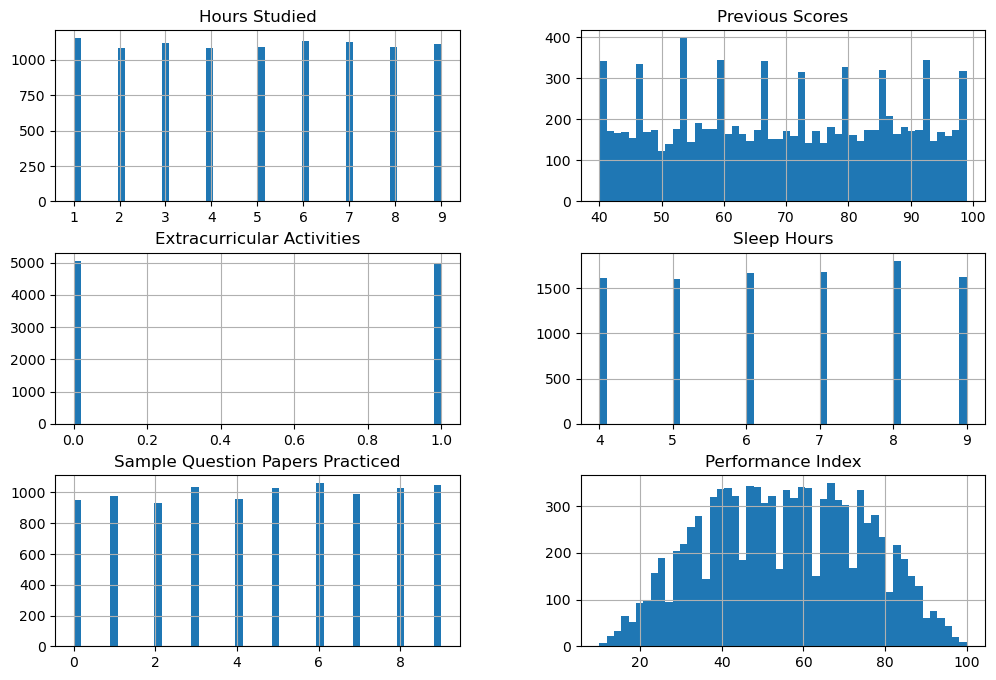

In [58]:
df.hist(bins=50, figsize=(12, 8))

**Make Pipeline**

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Identify numerical columns (assuming converted columns are included)
numerical_cols = x.columns

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale features
])

# Combine preprocessors into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols)
    ]
)

df_prepared = preprocessor.fit_transform(df)

<h2>Train the Model</h2>

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Train the Scikit-Learn model
lin_reg = make_pipeline(preprocessor, LinearRegression())
lin_reg.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

<h4>Test the Model</h4>

In [98]:
y_prediction = lin_reg.predict(x_test)
y_prediction

array([53.36212443, 39.83570318, 26.41815814, ..., 38.57153842,
       65.93898803, 36.35426192])

<h2>Evaluation of the Model</h2>

In [123]:
from sklearn.metrics import root_mean_squared_error
lin_rmse = root_mean_squared_error(y_test, y_prediction)
lin_rmse

2.0322916572360428

In [111]:
import numpy as np
comparison=y_test.copy()
comparison=pd.DataFrame(comparison)
comparison['Predicted Index'] = np.round(y_prediction)
comparison

,Performance Index,Predicted Index
3943,53.0,53.0
225,42.0,40.0
9361,28.0,26.0
5335,60.0,60.0
6408,53.0,52.0
...,...,...
3017,38.0,41.0
1538,68.0,66.0
7499,38.0,39.0
2440,68.0,66.0


In [121]:
from sklearn.metrics import r2_score

print("R^2 Score:", r2_score(y_test, y_prediction))

R^2 Score: 0.988890508359464


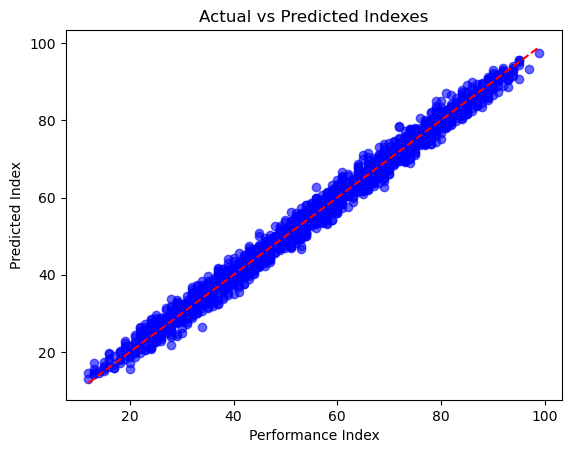

In [119]:
import matplotlib.pyplot as plt

# Scatter plot for predictions vs actual values
plt.scatter(y_test, y_prediction, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Performance Index")
plt.ylabel("Predicted Index")
plt.title("Actual vs Predicted Indexes")
plt.show()
